# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


In [3]:
!pip install tensorflow scikit-learn matplotlib

## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [6]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression


In [7]:
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [8]:
model = LogisticRegression()

In [9]:
model.fit(train_images_flattened, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
predictions = model.predict(test_images_flattened)

In [11]:
accuracy = accuracy_score(test_labels, predictions)
confusion_mat = confusion_matrix(test_labels, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8439
Confusion Matrix:
 [[807   4  17  48   5   2 108   0   9   0]
 [  2 961   1  25   5   0   4   0   2   0]
 [ 19   6 735  12 131   1  86   0  10   0]
 [ 30  12  12 869  29   0  44   0   4   0]
 [  0   2 108  38 756   1  87   0   8   0]
 [  0   0   0   1   0 925   0  51   3  20]
 [129   2 129  40 106   1 568   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  7   1   6  10   3   5  21   5 942   0]
 [  0   0   0   0   0  13   0  47   2 938]]


## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [18]:
model = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7675 - loss: 0.6648
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8639 - loss: 0.3719
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8737 - loss: 0.3437
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8785 - loss: 0.3223
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8906 - loss: 0.2961
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8976 - loss: 0.2802
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8974 - loss: 0.2713
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9037 - loss: 0.2566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9075 - loss: 0.2475
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9102 - loss: 0.2386


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8860 - loss: 0.3468

Test accuracy: 0.8859999775886536


## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

In [22]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


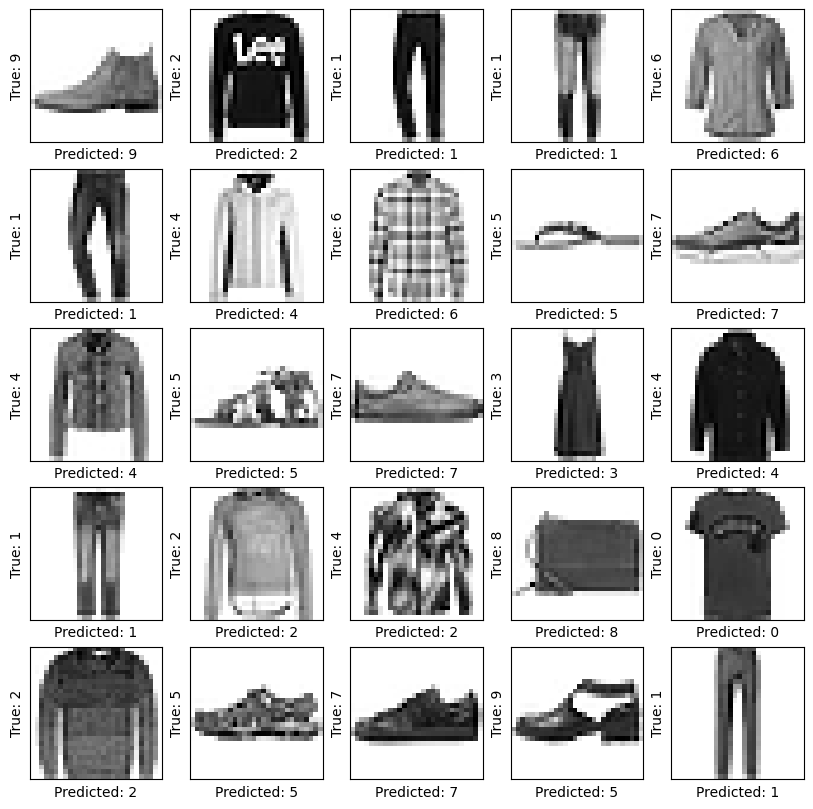

In [23]:
# Plot a grid of images with predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Predicted: {}".format(predicted_labels[i]))
    plt.ylabel("True: {}".format(test_labels[i]))
plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.